In [49]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [258]:
df1=pd.read_csv('myntra202305041052.csv')
df1.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [53]:
df1.describe()

,id,price,mrp,rating,ratingTotal,discount
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04


In [54]:
df1.shape

(1060213, 11)

In [55]:
df1.isnull().sum()

id             0
name           0
img            0
asin           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
purl           0
dtype: int64

In [56]:
df1.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

**Data Cleanning and Feature Engineering**

Dropping Duplicates

In [263]:
df1.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1060208    False
1060209    False
1060210    False
1060211    False
1060212    False
Length: 1060213, dtype: bool

In [58]:
no_of_duplicates=df1.duplicated().sum()
print('Number of Duplicates:',no_of_duplicates)

Number of Duplicates: 0


Dropping Unnecessary Columns:
We observe that for the data analysis these columns 'img', 'asin','purl' are not necessary and does not impact for process of EDA

In [61]:
df2=df1.drop(['img', 'asin', 'purl'],axis='columns')
df2.head()

,id,name,price,mrp,rating,ratingTotal,discount,seller
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster


Filling the Missing Values

In [62]:
df2.isnull().sum()

id             0
name           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
dtype: int64

In [63]:
df2.columns

Index(['id', 'name', 'price', 'mrp', 'rating', 'ratingTotal', 'discount',
       'seller'],
      dtype='object')

In [64]:
df2.ratingTotal

0           5300
1          25400
2           3400
3          18400
4           3800
           ...  
1060208       44
1060209       34
1060210        8
1060211      592
1060212        0
Name: ratingTotal, Length: 1060213, dtype: int64

In [65]:
df2.describe()

,id,price,mrp,rating,ratingTotal,discount
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04


In [66]:
df2[df2.discount==1.999600e+04]

,id,name,price,mrp,rating,ratingTotal,discount,seller
235289,235290,Gold-Plated Jewellery Set,4999.0,24995.0,0.0,0,19996,XPNSV
269783,269784,Gold-Plated Jewellery Set,4999.0,24995.0,0.0,0,19996,XPNSV


In [67]:
df2[['price','mrp','discount']]

,price,mrp,discount
0,532.0,1299.0,59
1,274.0,499.0,45
2,551.0,1199.0,54
3,296.0,1099.0,73
4,494.0,899.0,45
...,...,...,...
1060208,1199.0,2399.0,50
1060209,574.0,2299.0,75
1060210,799.0,1599.0,50
1060211,1199.0,1999.0,40


Observation:
 In the given discount column the values were not calculated properly I can find some
 wrong calculations and values. So let's drop the columns and we explicitly add discount 
 and discount percentage

In [68]:
df3=df2.drop(['discount'],axis='columns')
df3.head()

,id,name,price,mrp,rating,ratingTotal,seller
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,Difference of Opinion
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,Roadster
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,DILLINGER
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,Huetrap
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,Roadster


In [69]:
df3['total_discount']=(df3['mrp']-df3['price']).astype(int)
df3.head()

,id,name,price,mrp,rating,ratingTotal,seller,total_discount
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,Difference of Opinion,767
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,Roadster,225
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,DILLINGER,648
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,Huetrap,803
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,Roadster,405


In [70]:
df3['discount_perc']=(((df3.total_discount/df3.mrp)*100).astype(int))
df3.head()

,id,name,price,mrp,rating,ratingTotal,seller,total_discount,discount_perc
0,1,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,Difference of Opinion,767,59
1,2,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,Roadster,225,45
2,3,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,DILLINGER,648,54
3,4,Typography Print T-shirt,296.0,1099.0,4.0,18400,Huetrap,803,73
4,5,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,Roadster,405,45


**Exploratory Data Analysis**

**Univariate Statistical Analysis**

The univariate analysis is aimed at exploring the distribution of two crucial
variables–product price and customer ratings individually .By examining descriptive statistics andvisualizing the data, we gain insights into the central tendency, spread,  and potential outliers.This step is important for understanding the characteristics of pricing and rating patterns,which could inform further analysis and decision-making.

**Distributon of Price**

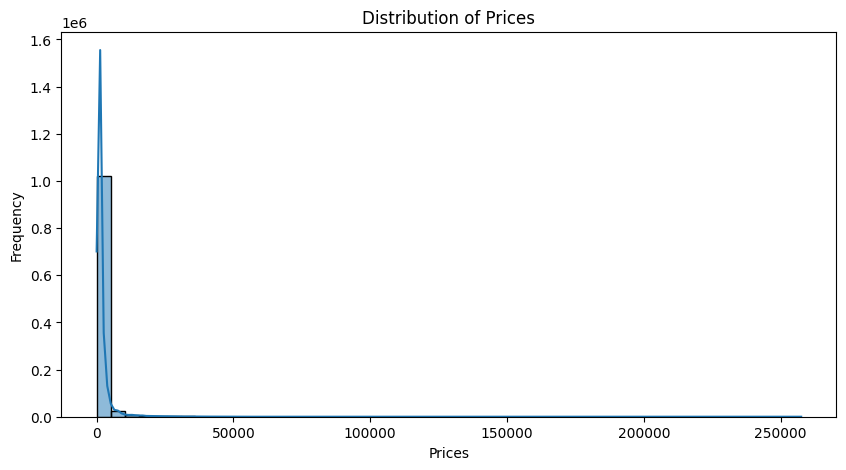

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(x=df3.price,kde=True,bins=50,data=df3)
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

**Observation:**

1.The price distribution also shows the highly left skewness, because of the substantial
gap between the least and most expensive products in the dataset.

2.To address this skewness, a logarithmic transformation was applied to the price variable.
By taking the logarithm of prices, the skewness was effectively reduced, resulting in a
more normal-like distribution.

3.This transformation not only handled the skewness issue but also facilitated better
interpretation and analysis of pricing patterns, as extreme values were brought closer
to the central tendency, enabling more robust statistical modeling and inference.

In [80]:
np.log1p(df3.price).describe()

count    1.060213e+06
mean     6.829711e+00
std      8.583894e-01
min      3.258097e+00
25%      6.214608e+00
50%      6.699500e+00
75%      7.311886e+00
max      1.245878e+01
Name: price, dtype: float64

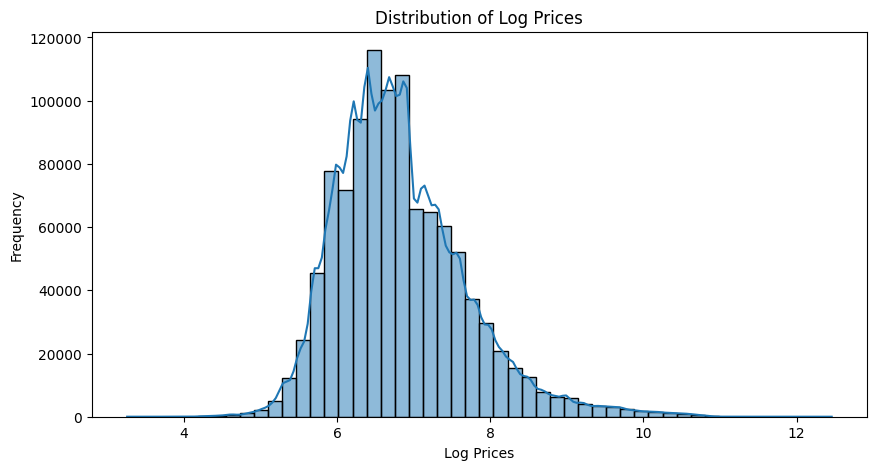

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(x=np.log1p(df3.price),bins=50,kde=True,data=df3)
plt.xlabel('Log Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Log Prices')
plt.show()

In [90]:
low_range=np.exp(5)
low_range

148.4131591025766

In [94]:
high_range=np.exp(9)
high_range

8103.083927575384

In [95]:
most_prices_low_range=np.exp(6)
most_prices_low_range

403.4287934927351

In [97]:
most_prices_high_range=np.exp(7)
most_prices_high_range

1096.6331584284585

**Observation**

1.This looks similiar like the distribution of prices without apply log function 
i.e after applying the log function to the distribution this distribution also contain
left skewness representing closer to the original prices 

2.Most logged prices fell in the range of 5 to 9,with maximum frequency occuring in
closer to the average values i.e in the range of 6,7 comprising over 110000 products 

3.The concentration of most prices between roughly INR 150 to INR 8,100 indicates 
that Myntra's product catalog predominantly focuses on mid-range and affordable 
fashion segments.

4.The highest frequency of prices occurring between INR 400 to INR 1,100 suggests that 
this price bracket likely represents Myntra's sweet spot, catering to a 
large consumer base seeking reasonably priced apparel and accessories.

**Distribution of Product Rating**

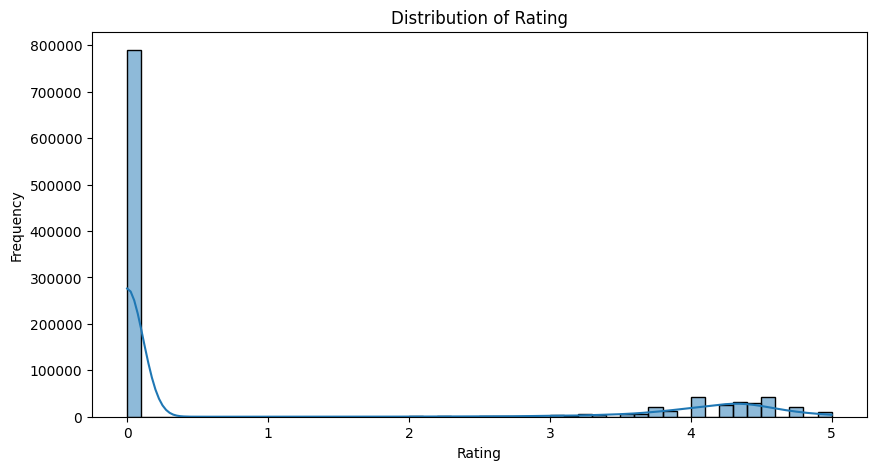

In [99]:
plt.figure(figsize=(10, 5))
sns.histplot(df3['rating'], bins=50, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [103]:
(df3[df3.rating==0.0]).shape[0]

789750

Here the most of rating is given as zero i.e might becustomer not statisfied or missing values or null points significantly for better understanding of
products rating let's eliminate the zero rating to find the patterns 

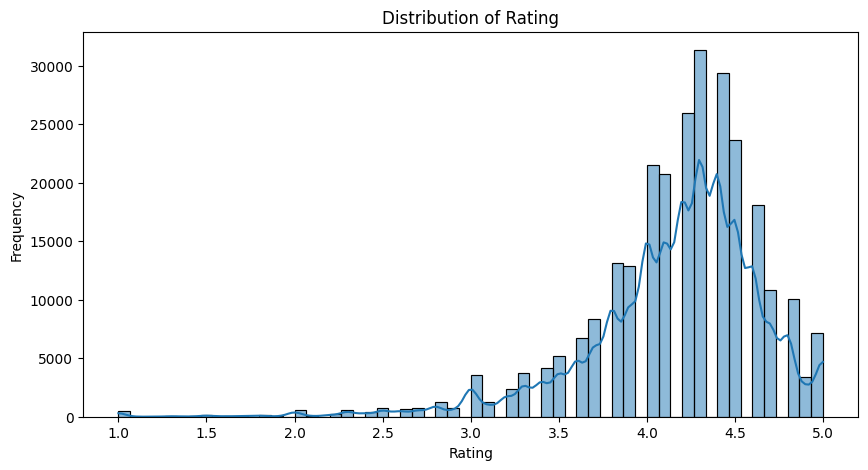

In [107]:
plt.figure(figsize=(10, 5))
sns.histplot(df3['rating'][df3['rating']>0], bins=60, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [123]:
df3['rating'][df3.rating>0].mode()

0    4.3
Name: rating, dtype: float64

In [124]:
df3['rating'][df3.rating>0].mean()

4.155779163878238

**Observation**

1.Here the most rating lies between 4 to 4.5 that's pretty good for the company as it show
Myntra gets nice and quality products and satisfying the customer needs in terms of quality

2.This skewed distribution towards higher ratings suggests positive customer sentiment 
and potentially highlights top-selling or popular product categories within the Myntra 
catalog.

**Multivariate Statistical Analysis**

The multivariate analysis is conducted to understand the potential associations and 
interdependencies among the various product attributes.
This analysis aimed to investigate the relationships between variables such as price, MRP,
discount amount, percentage discount offered, product ratings,
and the number of ratings received.
By examining the correlation structures, we can get insights into how these elements 
interact and influence one another.

In [112]:
df3.columns

Index(['id', 'name', 'price', 'mrp', 'rating', 'ratingTotal', 'seller',
       'total_discount', 'discount_perc'],
      dtype='object')

In [114]:
df3[['price', 'mrp', 'rating', 'ratingTotal',
       'total_discount', 'discount_perc']].corr()

,price,mrp,rating,ratingTotal,total_discount,discount_perc
price,1.000000,0.918306,-0.101084,-0.014117,0.315249,-0.202976
mrp,0.918306,1.000000,-0.114370,-0.020313,0.665181,0.055316
rating,-0.101084,-0.114370,1.000000,0.098691,-0.083514,0.036479
ratingTotal,-0.014117,-0.020313,0.098691,1.000000,-0.022069,-0.013551
total_discount,0.315249,0.665181,-0.083514,-0.022069,1.000000,0.515456
discount_perc,-0.202976,0.055316,0.036479,-0.013551,0.515456,1.000000


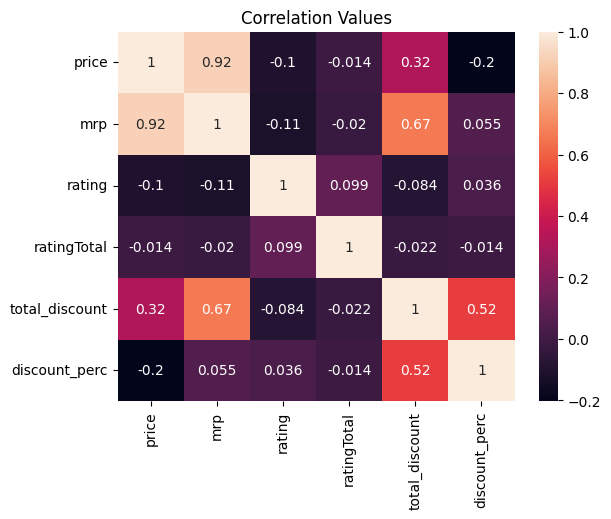

In [116]:
sns.heatmap(df3[['price', 'mrp', 'rating', 'ratingTotal',
       'total_discount', 'discount_perc']].corr(),annot=True)
plt.title('Correlation Values')
plt.show()

**Observations**

1.Ratings have a weak negative correlation with price and MRP, suggesting that more 
expensive products may not necessarily receive higher ratings.

2.The total discount amount has a moderate positive correlation with price and MRP,
implying that larger discounts are often associated with higher-priced items.

3.Percentage discounts exhibit a weak negative correlation with price, indicating that 
lower-priced items may offer relatively higher percentage discounts.

**More Analysis on Data**

**Most Expensive and Cheapest Product**

In [130]:
expensive_product=df3.sort_values(by='price',ascending=False).head()
expensive_product

,id,name,price,mrp,rating,ratingTotal,seller,total_discount,discount_perc
447028,447029,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,Versace,0,0
26184,26185,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,Versace,0,0
345950,345951,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,Versace,0,0
447791,447792,Men Stainless Steel Watch,146300.0,146300.0,0.0,0,Versace,0,0
447801,447802,Men Stainless Steel Watch,140500.0,140500.0,0.0,0,Versace,0,0


Text(0, 0.5, 'Prices')

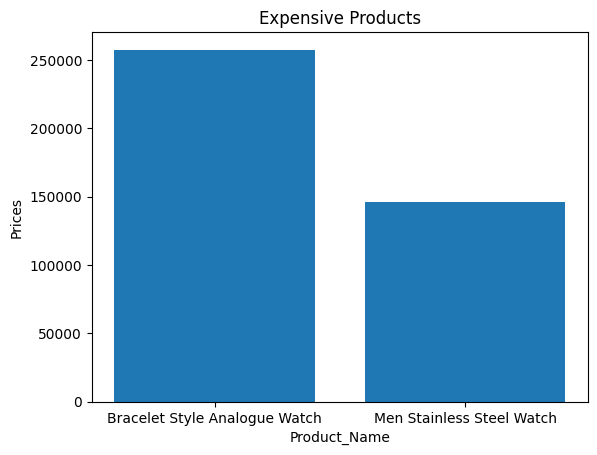

In [137]:
plt.bar(expensive_product.name,expensive_product.price)
plt.title('Expensive Products')
plt.xlabel('Product_Name')
plt.ylabel('Prices')

In [140]:
cheap_product=df3.sort_values(by='price').head()
cheap_product

,id,name,price,mrp,rating,ratingTotal,seller,total_discount,discount_perc
66656,66657,Hair Colour - Natural Black 1,25.0,25.0,4.3,139,Streax,0,0
222626,222627,Hair Colour - Burgundy 3.16,25.0,25.0,4.2,120,Streax,0,0
355788,355789,Hair Colour - 4 Natural Brown,25.0,25.0,3.9,14,Streax,0,0
82496,82497,Hair Colour - Dark Brown 3,25.0,25.0,4.3,65,Streax,0,0
83918,83919,Hair Colour - Natural Brown 4,25.0,25.0,4.2,79,Streax,0,0


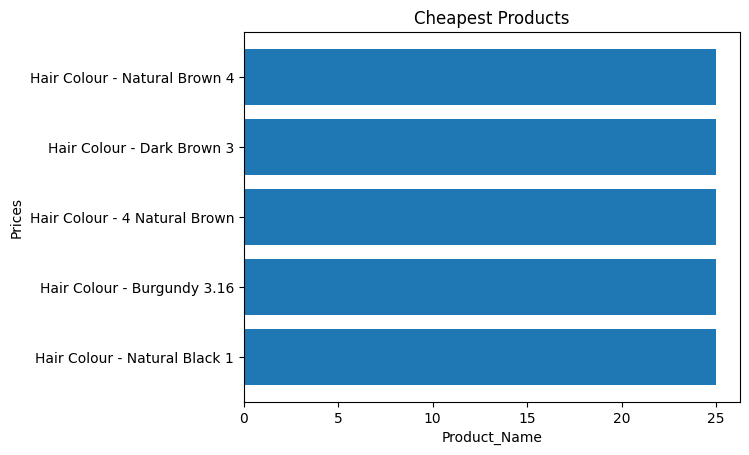

In [157]:
plt.barh(cheap_product.name,cheap_product.price)
plt.title('Cheapest Products')
plt.xlabel('Product_Name')
plt.ylabel('Prices')
plt.show()

**Top Listed Products**

In [152]:
df3.name.value_counts().head(10)

name
Men Polo Collar T-shirt           5644
Gold-Plated Jewellery Set         5485
Men Typography Printed T-shirt    4326
Printed Round Neck T-shirt        4055
Men Slim Fit Jeans                4046
Men Printed T-shirt               3874
Men Pure Cotton T-shirt           3763
Women Analogue Watch              3649
Women Open Toe Flats              2940
Women Night suit                  2923
Name: count, dtype: int64

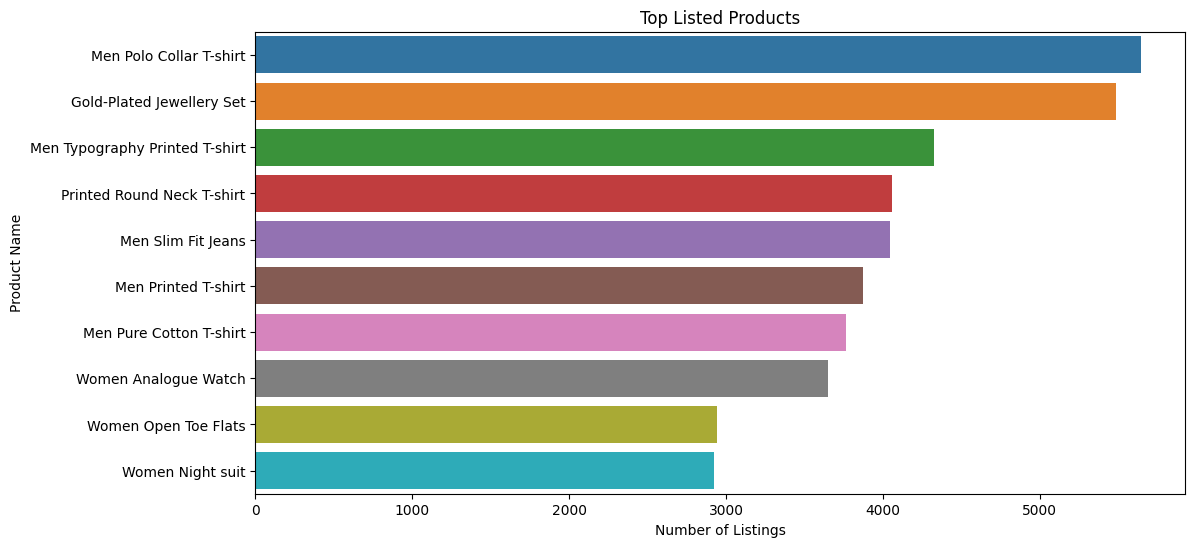

In [155]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df3.name.value_counts().head(10).values, y=df3.name.value_counts().head(10).index,
           hue=df3.name.value_counts().head(10).index)
plt.title('Top Listed Products')
plt.xlabel('Number of Listings')
plt.ylabel('Product Name')
plt.show()

**Top Rated Products**

In [250]:
top_rated_products = df3.sort_values(by=['rating', 'ratingTotal'], ascending=[False, False]).head(10)
top_rated_products

,id,name,price,mrp,rating,ratingTotal,seller,total_discount,discount_perc
180080,180081,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
245742,245743,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
376871,376872,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
379391,379392,Brightening Foaming Face Wash,327.0,399.0,5.0,264,Organic Harvest,72,18
126865,126866,Multigreens Face Cleanser,285.0,475.0,5.0,174,Happier,190,40
128126,128127,Multigreens Face Cleanser,285.0,475.0,5.0,174,Happier,190,40
195941,195942,Multigreens Face Cleanser,285.0,475.0,5.0,174,Happier,190,40
131946,131947,Soulfood Body Scrub 175 g,337.0,675.0,5.0,89,Happier,338,50
199389,199390,Soulfood Body Scrub 175 g,337.0,675.0,5.0,89,Happier,338,50
443599,443600,Soulfood Body Scrub 175 g,337.0,675.0,5.0,89,Happier,338,50


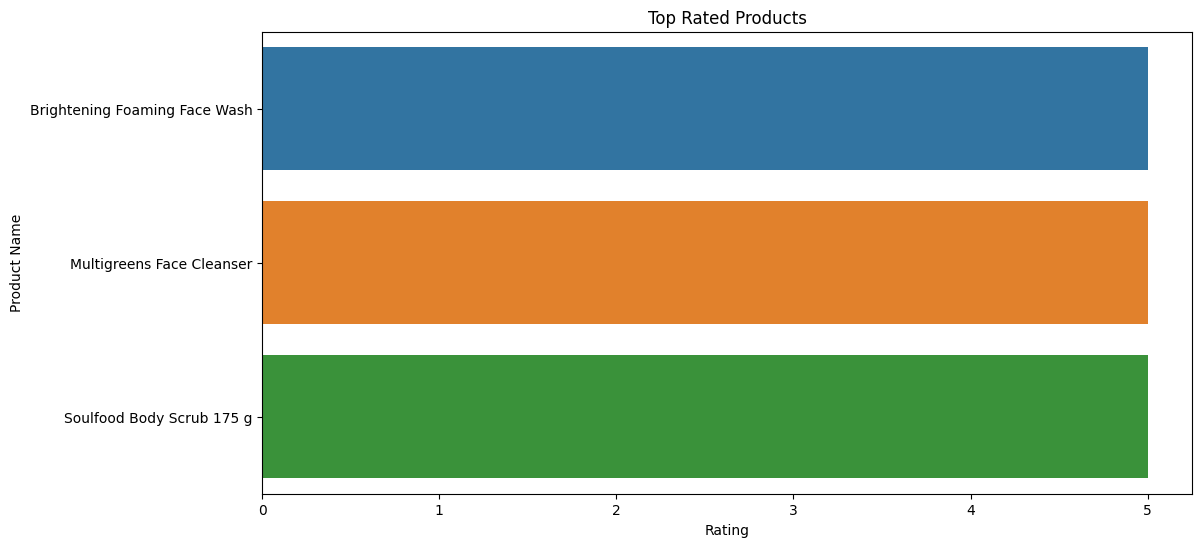

In [246]:
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_products,hue='name')
plt.title('Top Rated Products')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.show()